# Project 4 - American Community Survey Data Analysis

In this project we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.
Some of the columns in the dataset are:
-Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

By using visualizations we will be trying to answer the following questions:
- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plot

In [6]:
#Importing the pandas and matplot lib into the environment
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [7]:
#Reading the dataset and returning the first row
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [8]:
#Becoming familiar with the data structure by analyzing the first 10 rows
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [10]:
#Generating a quick summary of statistics for all the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [20]:
raw_data_count=recent_grads.shape[0]

In [21]:
raw_data_count

173

In [24]:
#droping the rows that contain missing data and counting the number of rows remaining
recent_grads=recent_grads.dropna(0)
cleaned_data_count=recent_grads.shape[0]
cleaned_data_count

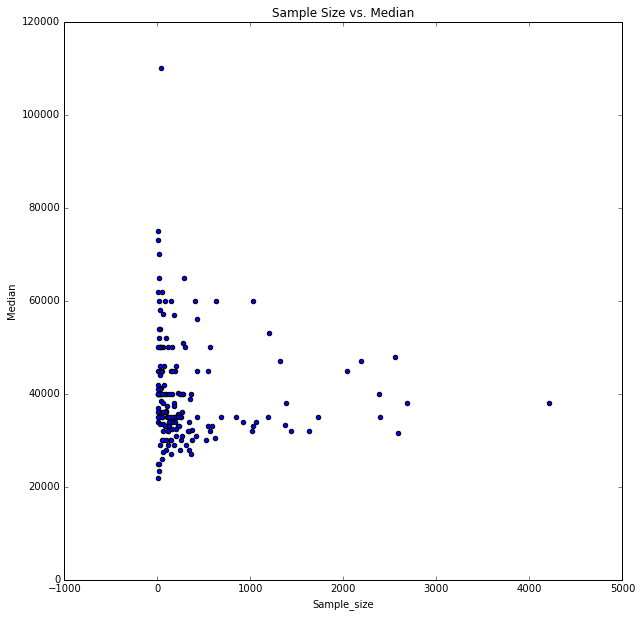

In [44]:
#Plotting the Sample Size versus Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs. Median', figsize=(10,10))


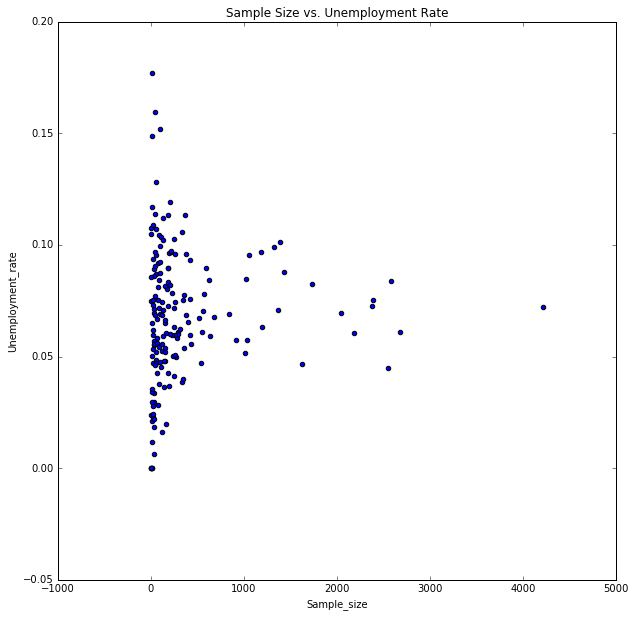

In [43]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs. Unemployment Rate', figsize=(10,10))

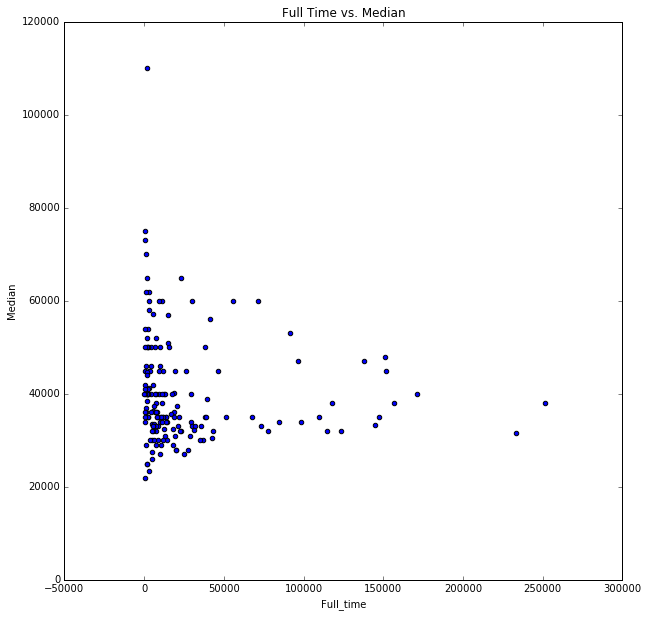

In [42]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs. Median', figsize=(10,10))

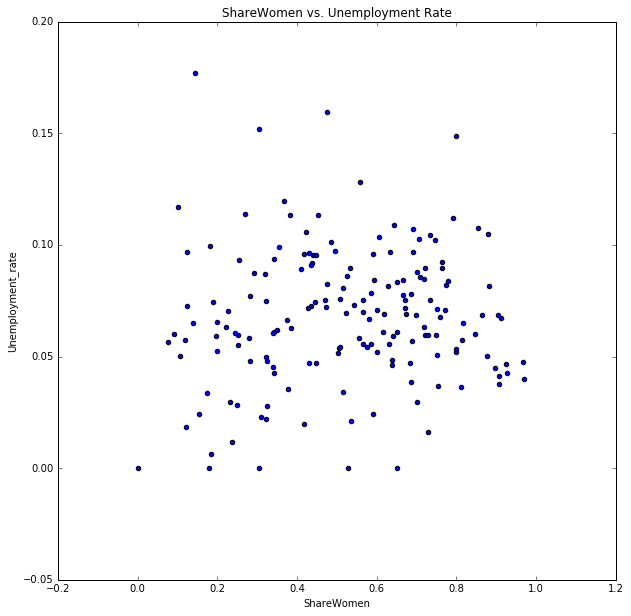

In [41]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment Rate', figsize=(10,10))

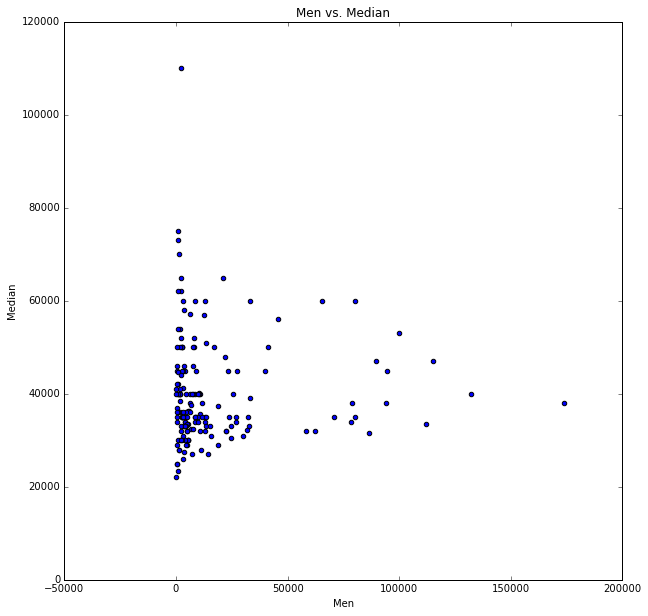

In [40]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median', figsize=(10,10))

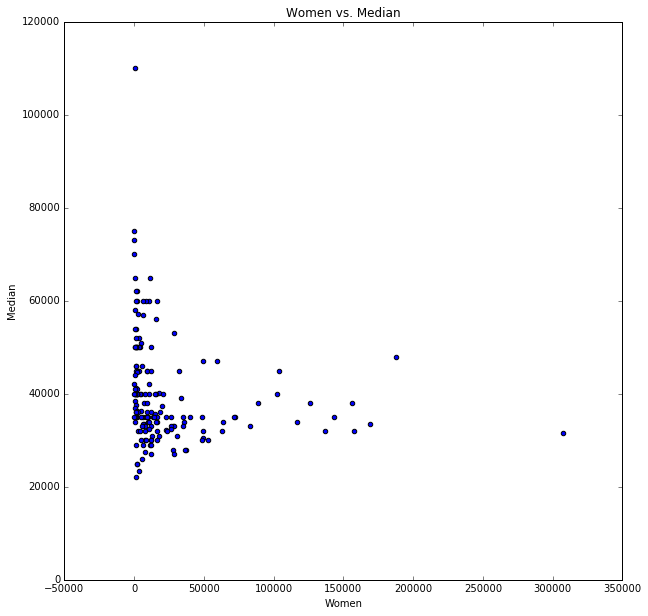

In [39]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median', figsize=(10,10))

- Do students in more popular majors make more money?
    - No, as we tend to go towards less popular majors, the salaries increase. The biggest hikes in salary are within less than 1000 sample size
- Do students that majored in subjects that were majority female make more money?
    - No, as we compare the men and women charts we see that, for both, less popular majors tend to have higher salaries but as we go along we see that the men have a higher range of salaries than the women. Taking, for example, the range of 50000-100000 we see that, for women the range of salaries is 42K-45k.
    For the same range, but in men, the salary range is 52k-60k.
- Is there any link between the number of full-time employees and median salary?
    - As the number of full time employees tends to increase the salary decrease, which means that the most common jobs tend to make less money.

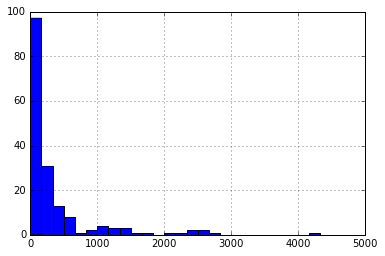

In [56]:
recent_grads["Sample_size"].hist(bins=30,range=(0,5000))

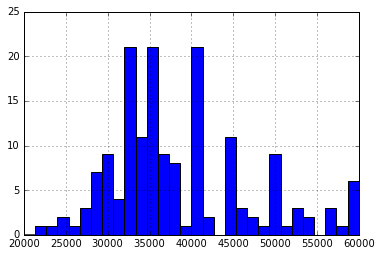

In [85]:
recent_grads["Median"].hist(bins=30,range=(20000,60000))

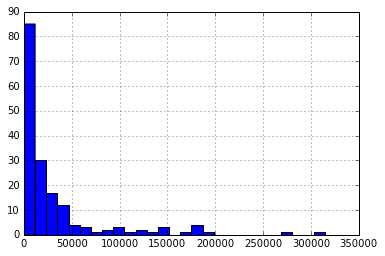

In [54]:
recent_grads["Employed"].hist(bins=30,range=(0,350000))

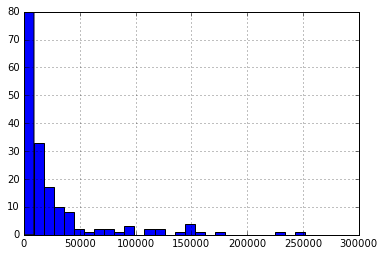

In [58]:
recent_grads["Full_time"].hist(bins=30,range=(0,270000))

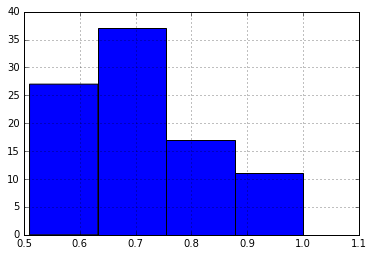

In [94]:
recent_grads["ShareWomen"].hist(bins=4,range=(0.51,1))

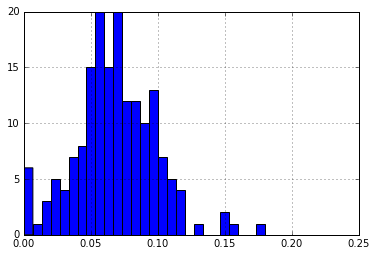

In [66]:
recent_grads["Unemployment_rate"].hist(bins=30,range=(0,0.2))

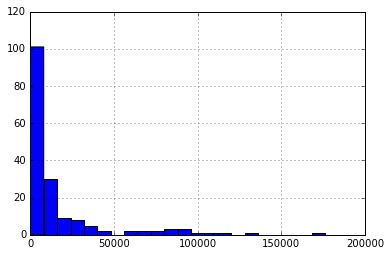

In [87]:
recent_grads["Men"].hist(bins=25,range=(0,200000))

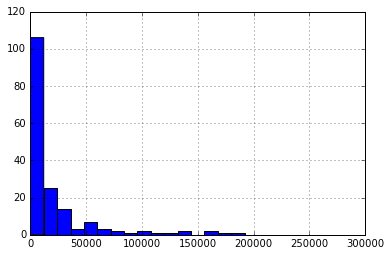

In [88]:
recent_grads["Women"].hist(bins=25,range=(0,300000))

- What percent of majors are predominantly male? Predominantly female?
    - 91 major that are predominantly female (53%) while 82 (47%) are predominantly male
- What's the most common median salary range?
    - Most common range of salaries in from 30k-40k

NameError: name 'scatter_matrix' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa3c129b0>,
      dtype=object)

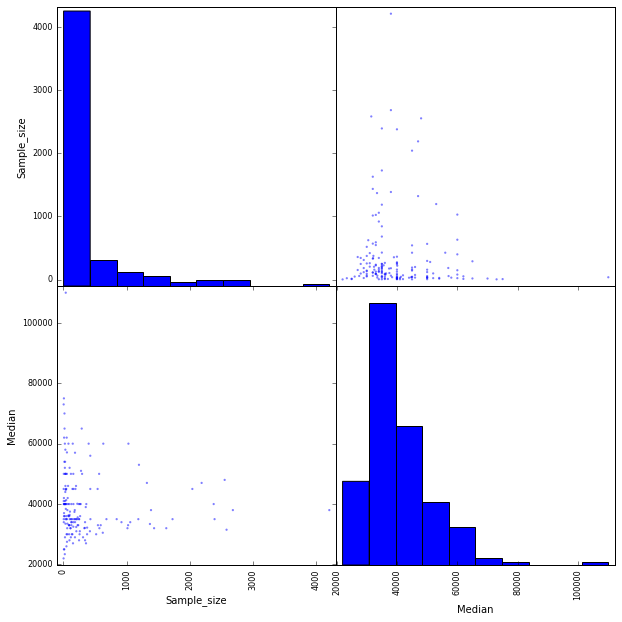

In [107]:
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa3ac7518>,
      dtype=object)

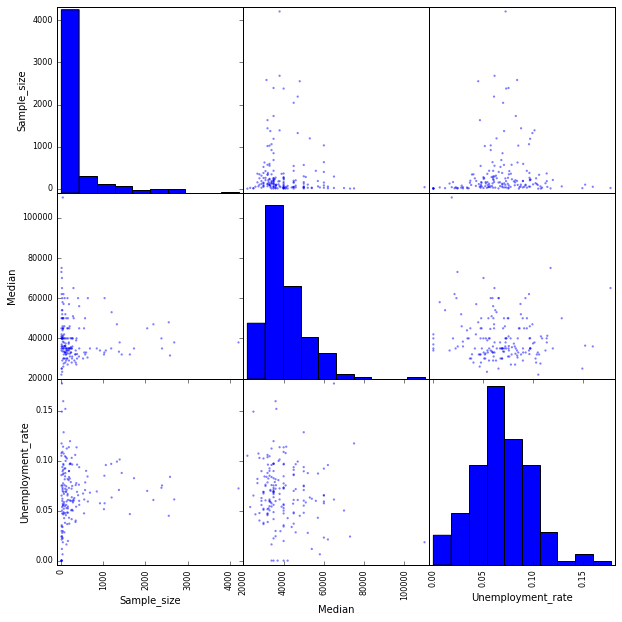

In [108]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa371d780>,
      dtype=object)

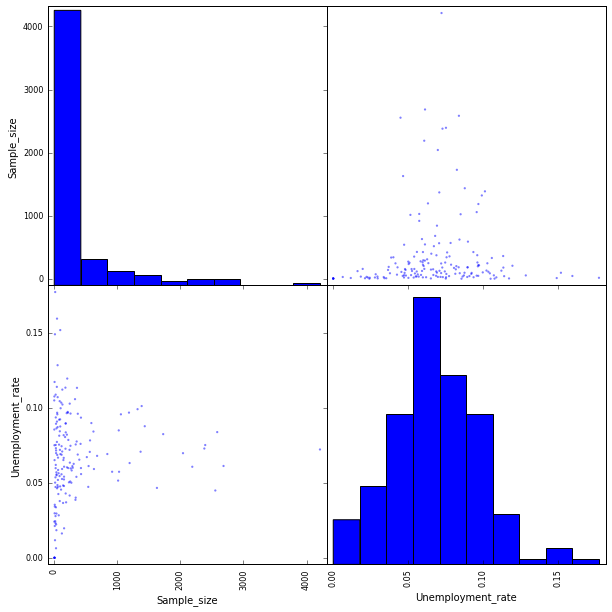

In [109]:
#Sample Size vs Unemployment Rate
scatter_matrix(recent_grads[['Sample_size', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa35b5668>,
      dtype=object)

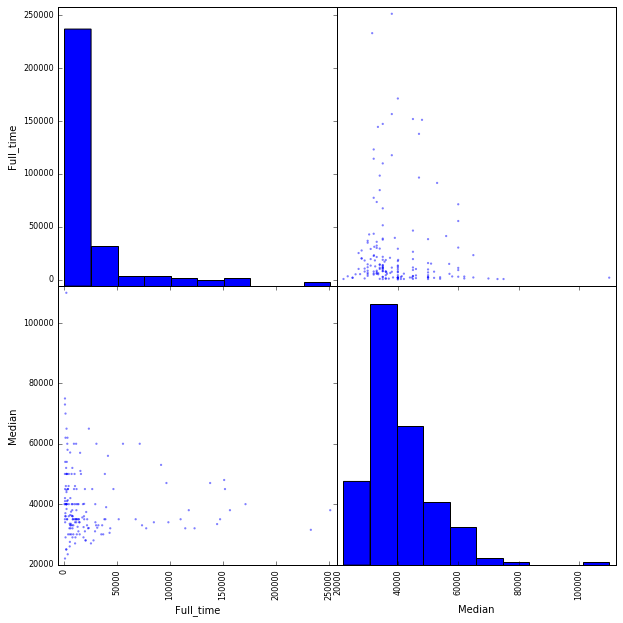

In [110]:
#Full Time vs Median
scatter_matrix(recent_grads[['Full_time', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa33aa2b0>,
      dtype=object)

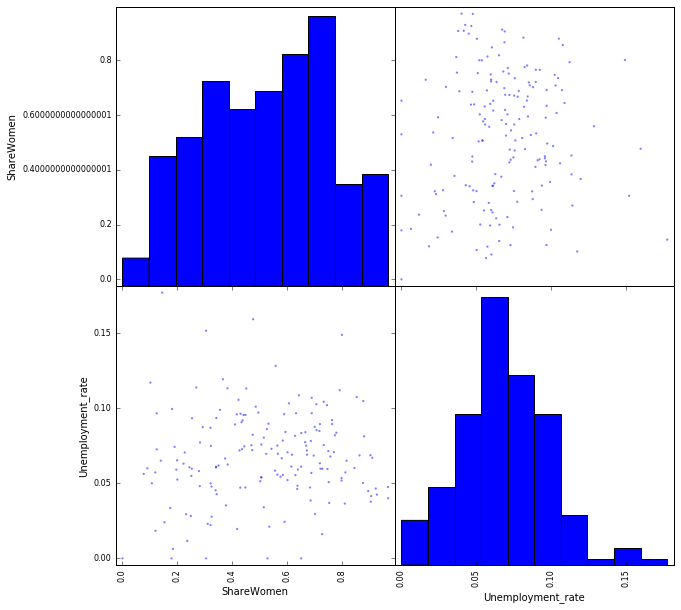

In [111]:
#Share Women vs Unemployment rate
scatter_matrix(recent_grads[['ShareWomen', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa32325c0>,
      dtype=object)

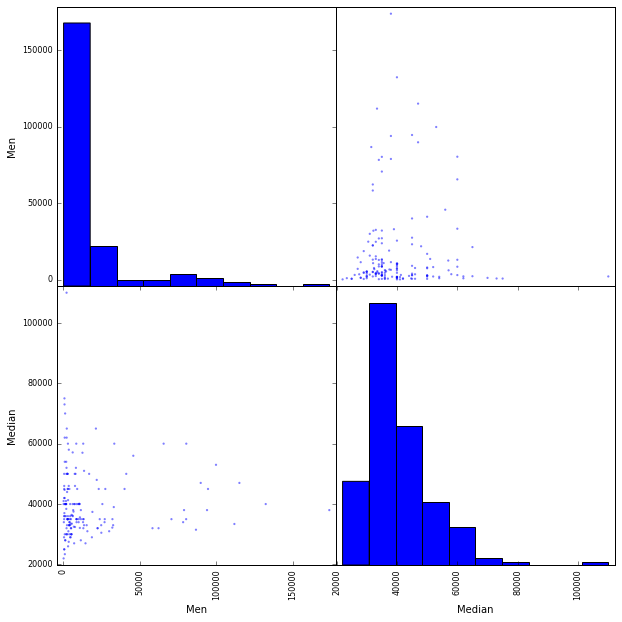

In [112]:
#Men vs Median
scatter_matrix(recent_grads[['Men', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa31cbf98>,
      dtype=object)

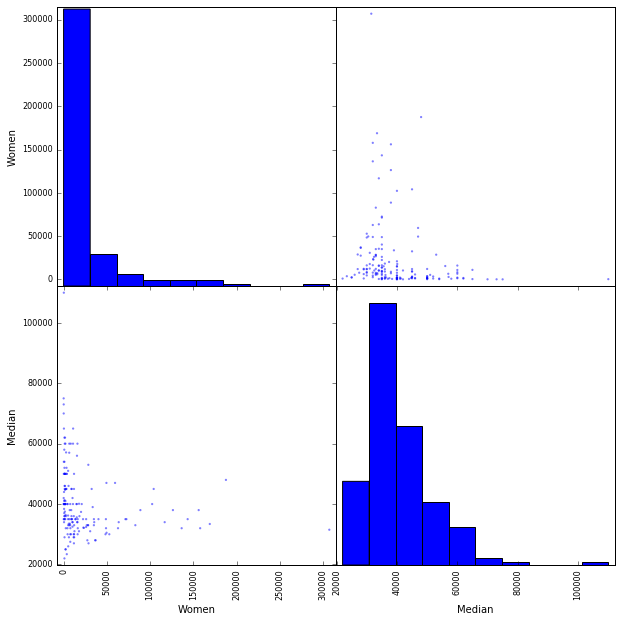

In [114]:
#Women vs Median
scatter_matrix(recent_grads[['Women', 'Median']], figsize=(10,10))

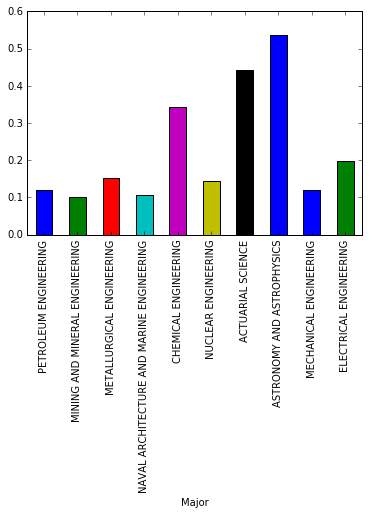

In [121]:
#Percentages of women, first 10 rows
recent_grads[0:10].plot(x='Major',y='ShareWomen',kind='bar',legend=False)
#Highest percentage of women in Astronomy and Astrophysics lowest on Mining and Mineral Engineering

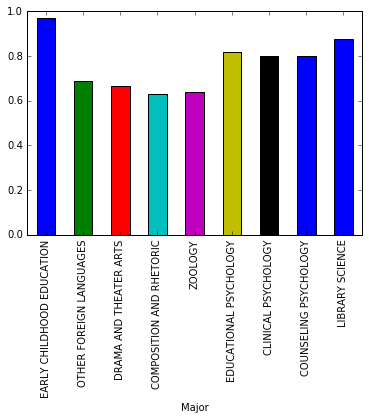

In [122]:
#Percentages of women, last 10 rows
recent_grads[163:].plot(x='Major',y='ShareWomen',kind='bar',legend=False)
#Highest percentage of women in Early Childhood Education, lowest on composition and rethoric

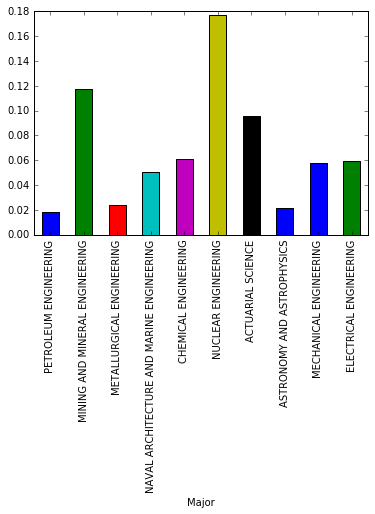

In [123]:
#Unemployment rate, first 10 rows
recent_grads[0:10].plot(x='Major',y='Unemployment_rate',kind='bar',legend=False)
#Highest unemployment rate on Nuclear Engineering and lowest on Petroleum Engineering

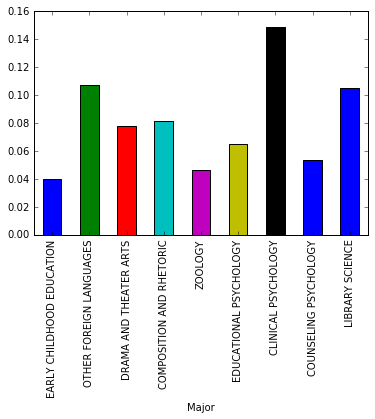

In [124]:
#Unemployment rate, last 10 rows
recent_grads[163:].plot(x='Major',y='Unemployment_rate',kind='bar',legend=False)
#Higher unemployment rate on Clinical Psychology, lowest on early childhood eduation